# Data Analyst Project (SP-ZG001)
This is the Professional Certificate Data Analytics Course Final Project

## Task 1: Topic and Data Set 
Explain the chosen topic and provide details about the dataset, along with a clear explanation of the business hypothesis.

### Reading file

In [28]:
# import library
import pandas as pd

# read file
data = pd.read_csv('data.csv',encoding = "ISO-8859-1")

# view file
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Basic Info

In [29]:
# find data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Statistical Description

In [30]:
# statistical description

data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


## Task 2: Data Analysis & Prediction

### Missing Value

In [31]:
missing_values = data.isnull().sum()
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Outlier

To detect outliers in the **"Quantity"** and **"UnitPrice"** columns, we can use the Interquartile Range (IQR) method. This involves:
1. Calculating the first (Q1) and third quartiles (Q3) for each column.
2. Determining the IQR, which is the difference between Q3 and Q1.
3. Identifying outliers as values that fall below Q1−1.5×IQR or above Q3+1.5×IQR.

Based on the Interquartile Range (IQR) method:

- There are 58,619 outliers detected in the "Quantity" column.
- There are 39,627 outliers detected in the "UnitPrice" column.

In [32]:
# Function to remove outliers using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data to keep only non-outlier values
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data

# Remove outliers from "Quantity" and "UnitPrice" columns
data_cleaned = remove_outliers(data, "Quantity")
data_cleaned = remove_outliers(data_cleaned, "UnitPrice")

# Summary of dataset size before and after outlier removal
original_size = len(data)
cleaned_size = len(data_cleaned)
original_size, cleaned_size


(541909, 450820)

### Remove Negative Values in Quantity

In [33]:
# Remove rows where "Quantity" is negative
data_cleaned = data_cleaned[data_cleaned["Quantity"] >= 0]


### Scatter Plot - Quantity x UnitPrice

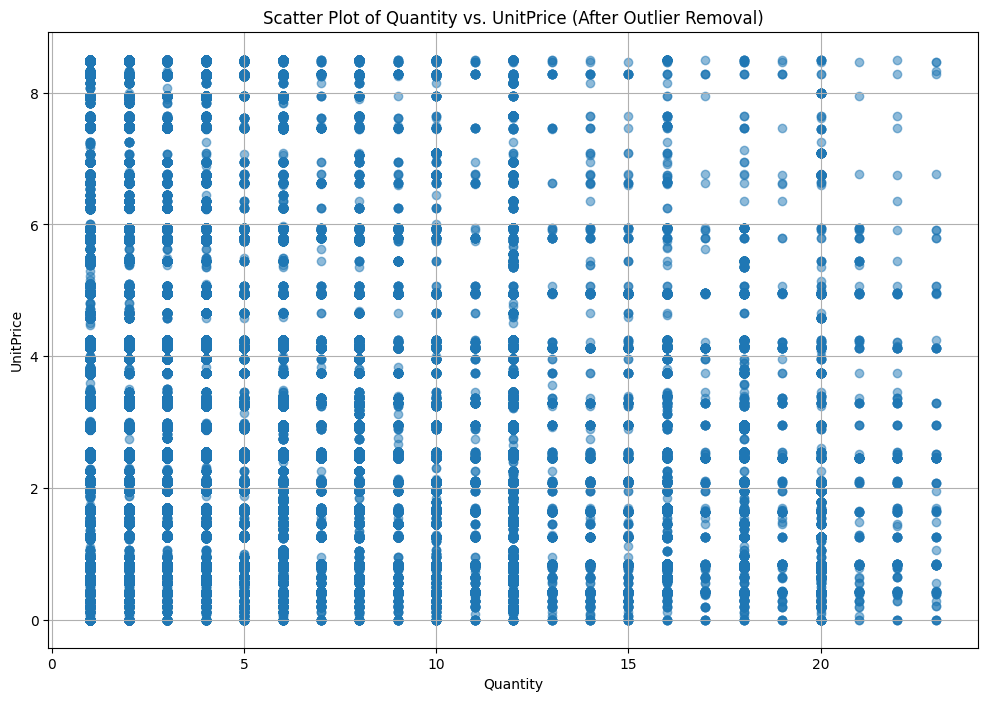

In [34]:
import matplotlib.pyplot as plt

# Scatter plot for "Quantity" and "UnitPrice"
plt.figure(figsize=(12, 8))
plt.scatter(data_cleaned["Quantity"], data_cleaned["UnitPrice"], alpha=0.5)
plt.title("Scatter Plot of Quantity vs. UnitPrice (After Outlier Removal)")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.grid(True)
plt.show()


### Testing Relationship

In [35]:
# find Pearson correlation coeeficient
correlation_coefficient = data_cleaned["Quantity"].corr(data_cleaned["UnitPrice"])
correlation_coefficient

-0.29379185659358714

## Updated Business Hypothesis

### Create New Variable

In [36]:
# Create the new "TotalSales" variable
data_cleaned["TotalSales"] = data_cleaned["Quantity"] * data_cleaned["UnitPrice"]

# Display the first few rows of the dataset with the new variable
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


### New Cleaned Dataset

In [37]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


### Scatter Plot - Quantity x TotalSales

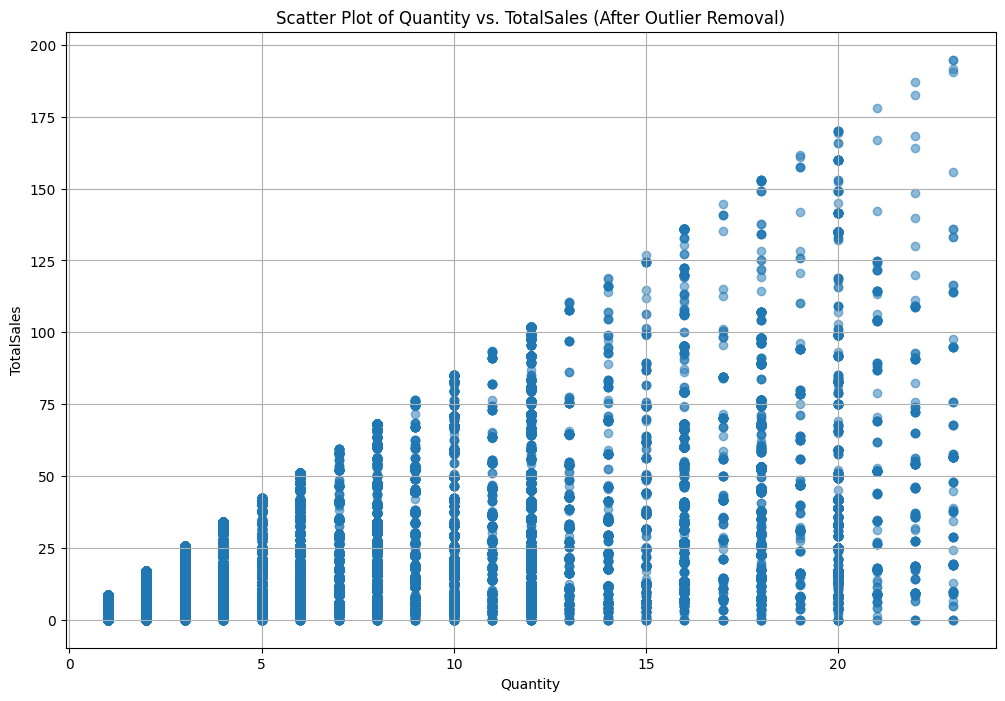

In [38]:
# Scatter plot for "Quantity" and "TotalSales"
plt.figure(figsize=(12, 8))
plt.scatter(data_cleaned["Quantity"], data_cleaned["TotalSales"], alpha=0.5)
plt.title("Scatter Plot of Quantity vs. TotalSales (After Outlier Removal)")
plt.xlabel("Quantity")
plt.ylabel("TotalSales")
plt.grid(True)
plt.show()

### Testing Relationship

In [39]:
# find Pearson correlation coeeficient
correlation_coefficient = data_cleaned["Quantity"].corr(data_cleaned["TotalSales"])
correlation_coefficient

0.5882036715789409

### Write New Data

In [40]:
# Save the cleaned dataset to a CSV file
data_cleaned.to_csv('cleaned_data.csv', index=False)


## Prediction 

Mean Squared Error: 90.66126050699083
R^2 Score: 0.3459863328524473
Coefficient: 1.5457107260017844
Intercept: 3.3470576409541266


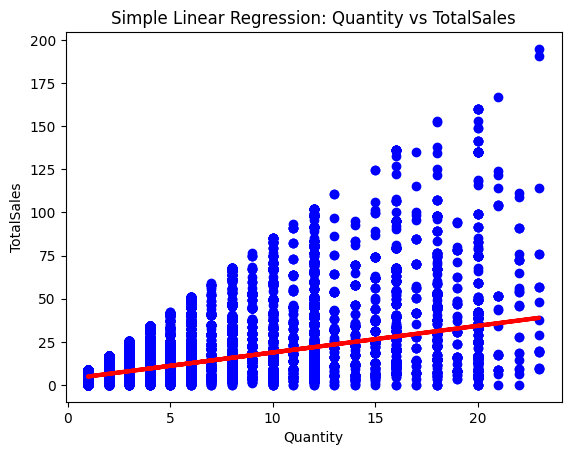

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Extract the independent variable (Quantity) and dependent variable (TotalSales)
X = data_cleaned[['Quantity']]
y = data_cleaned['TotalSales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Model coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Print results
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficient:", coef)
print("Intercept:", intercept)

# Plotting the regression line and the test data
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Quantity')
plt.ylabel('TotalSales')
plt.title('Simple Linear Regression: Quantity vs TotalSales')
plt.show()
